<a href="https://colab.research.google.com/github/JohnnyHackz/Capstone_Project/blob/main/wguCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/combined_data.csv')
print(data.columns)

Index(['label', 'text'], dtype='object')


In [ ]:
# Splitting the dataset into features and labels
X = data['text']
y = data['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a text processing and model pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Training the model
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


def classify_email_and_suggest_action():
    user_input = text_area.value
    if user_input:  # Check if the input is not empty
        prediction = model.predict([user_input])
        if prediction[0] == 1:  # Assuming 1 is for spam
            result = 'Spam'
            action_suggestion = "Suggested action: Delete the email, move it to the spam folder, or block the sender."
        else:  # Assuming any other prediction is for not-spam
            result = 'Not Spam'
            action_suggestion = "Suggested action: Reply to the email or archive it for future reference."
    else:
        print("Please input email contents. Thank you.")
        return  # Exit the function if there's no input

    output_label.value = f'The email is classified as: {result}\n{action_suggestion}'
    print(output_label.value)


# Creating UI elements for user input and classification
text_area = widgets.Textarea(placeholder='Type or paste the email content here...', layout={'width': '400px', 'height': '200px'})
classify_button = widgets.Button(description='Classify Email', button_style='info')
output_label = widgets.Label()

# Event handling
classify_button.on_click(lambda x: classify_email_and_suggest_action())

# Display UI
display(text_area, classify_button, output_label)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7938
           1       0.99      0.97      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



Textarea(value='', layout=Layout(height='200px', width='400px'), placeholder='Type or paste the email content …

Button(button_style='info', description='Classify Email', style=ButtonStyle())

Label(value='')

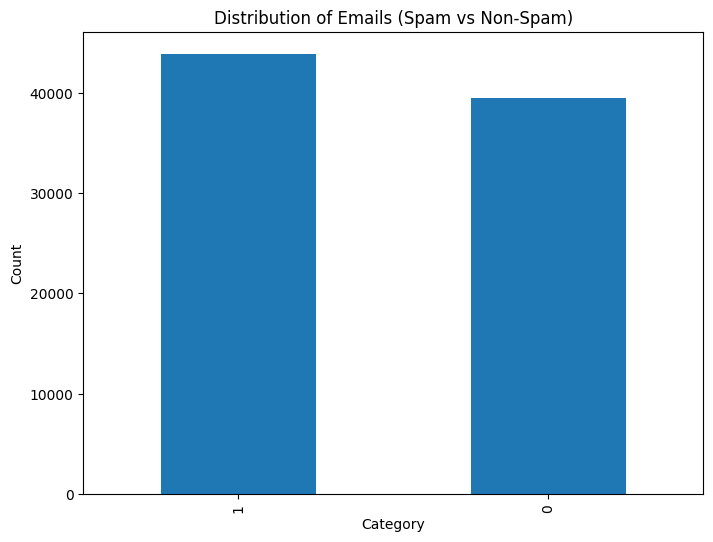

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sb

# Visualization 1: Bar Chart of Email Categories
def plot_email_distribution():
    plt.figure(figsize=(8, 6))
    data['label'].value_counts().plot(kind='bar')
    plt.title('Distribution of Emails (Spam vs Non-Spam)')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

plot_email_distribution()

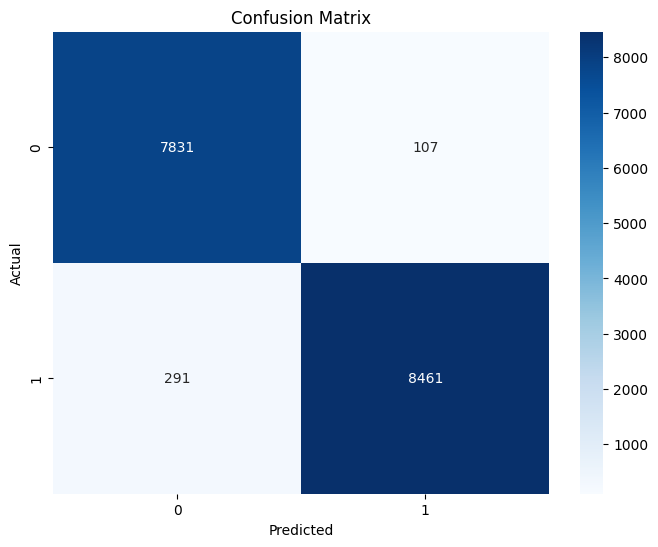

In [ ]:
# Visualization 2: Confusion Matrix Heatmap
def plot_confusion_matrix():
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sb.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix()


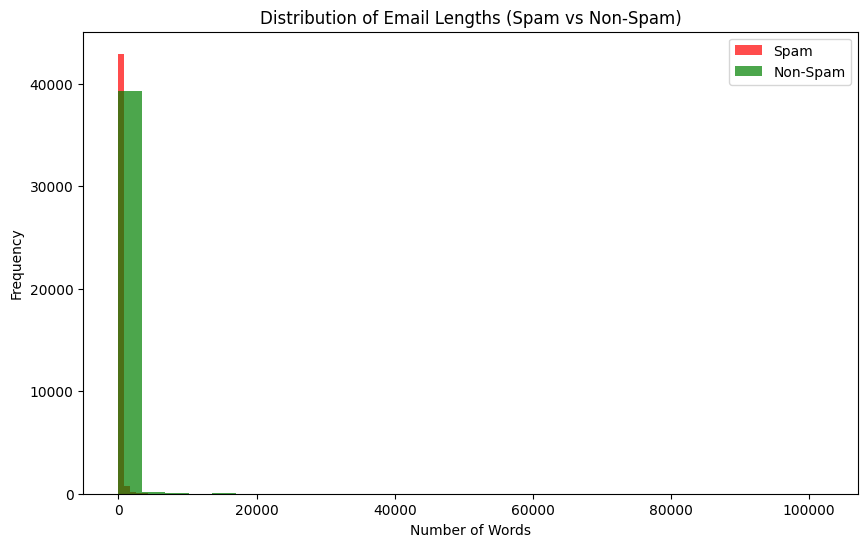

In [ ]:
# Visualization 3: Histogram of Email Lengths
def plot_email_length_histogram(label):
    # Extracting email messages based on label
    emails = data[data['label'] == label]['text']

    # Calculate length of each email
    email_lengths = emails.apply(lambda x: len(x.split()))

    plt.figure(figsize=(8, 6))
    plt.hist(email_lengths, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {"Spam" if label == 1 else "Non-Spam"} Email Lengths')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

def plot_combined_email_length_histogram():
    # Extracting email messages for both categories
    spam_emails = data[data['label'] == 1]['text']
    non_spam_emails = data[data['label'] == 0]['text']

    # Calculate length of each email
    spam_lengths = spam_emails.apply(lambda x: len(x.split()))
    non_spam_lengths = non_spam_emails.apply(lambda x: len(x.split()))

    plt.figure(figsize=(10, 6))

    # Plotting both histograms
    plt.hist(spam_lengths, bins=30, color='red', alpha=0.7, label='Spam')
    plt.hist(non_spam_lengths, bins=30, color='green', alpha=0.7, label='Non-Spam')

    plt.title('Distribution of Email Lengths (Spam vs Non-Spam)')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_combined_email_length_histogram()